### 1. SMS Data Exploration

SMS data is available as CSV file along with class material. In the code below, we are copying the from Google drive.

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pandas as pd
import numpy as np

In [60]:
# read file into pandas using a relative path. Please change the path as needed
sms_df = pd.read_table('/content/drive/MyDrive/Colab Notebooks/data/sms.tsv', header=None, names=['label', 'message'])

In [61]:
#Total number of SMS
sms_df.shape

(5572, 2)

In [62]:
#Check the contents of dataframe
sms_df.sample(n=5)

,label,message
3971,ham,That's the trouble with classes that go well -...
3848,spam,Fantasy Football is back on your TV. Go to Sky...
4513,ham,Now project pa. After that only i can come.
1546,ham,"Good afternoon, my love ! Any job prospects ? ..."
418,spam,FREE entry into our £250 weekly competition ju...


In [63]:
#Spam vs ham
sms_df.groupby('label').count()

,message
label,
ham,4825
spam,747


Null Accuracy - Predicting --> accuracy without model

In [64]:
4825/5572

0.8659368269921034

In [65]:
#Check out SMS messages which is legitimate - ham
msg_num = np.random.randint(0, sms_df.shape[0])
print(sms_df.loc[msg_num, 'label'], ':', sms_df.loc[msg_num, 'message'])

ham : Ok. There may be a free gym about.


In [66]:
#Check out SMS messages which is a SPAM
print(sms_df.loc[1734, 'label'], ':', sms_df.loc[1734, 'message'])

spam : Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive £5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....


In [67]:
#Checkout missing values
sms_df.isnull().sum()

label      0
message    0
dtype: int64

In [68]:
# convert label to a numerical variable
sms_df['label_num'] = sms_df.label.map({'ham':0, 'spam':1})

In [69]:
#We should have label_num column in dataframe
sms_df.sample(n=15)

,label,message,label_num
1482,ham,"I'm a guy, browsin is compulsory",0
3378,ham,Yup. Wun believe wat? U really neva c e msg i ...,0
1279,ham,Can i meet ü at 5.. As 4 where depends on wher...,0
1140,ham,Message:some text missing* Sender:Name Missing...,0
3661,ham,I will reach ur home in &lt;#&gt; minutes,0
1781,spam,BIG BROTHER ALERT! The computer has selected u...,1
308,ham,Lol yes. Our friendship is hanging on a thread...,0
3064,spam,"Hi babe its Jordan, how r u? Im home from abro...",1
968,ham,What do u want when i come back?.a beautiful n...,0
1558,ham,Wat r u doing?,0


### 2. Create Training & Test Dataset

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# split X and y into training and testing sets
sms_train, sms_test, y_train, y_test = train_test_split(sms_df.message, sms_df.label_num, random_state=2)

In [72]:
#Traing data
print(sms_train.shape)
print(y_train.shape)

(4179,)
(4179,)


In [73]:
#Test Data
print(sms_test.shape)
print(y_test.shape)

(1393,)
(1393,)


### 3. Tokenization & Vectorization

Using **CountVectorizer**, to get numeric features.

In [74]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()

In [75]:
#Feed SMS data to CountVectorizer
cvect.fit(sms_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [76]:
#Check the vocablury size
len(cvect.vocabulary_)

7450

In [77]:
#What is there in the vocabulary
cvect.vocabulary_

{'ok': 4703,
 'gonna': 3055,
 'head': 3219,
 'up': 6914,
 'to': 6669,
 'usf': 6950,
 'in': 3493,
 'like': 3930,
 'fifteen': 2729,
 'minutes': 4301,
 'that': 6550,
 'shame': 5820,
 'maybe': 4205,
 'cld': 1762,
 'meet': 4230,
 'for': 2827,
 'few': 2718,
 'hrs': 3384,
 'tomo': 6693,
 'will': 7235,
 'do': 2283,
 'was': 7110,
 'exhausted': 2602,
 'on': 4722,
 'train': 6746,
 'this': 6590,
 'morning': 4387,
 'too': 6709,
 'much': 4430,
 'wine': 7244,
 'and': 920,
 'pie': 4983,
 'you': 7410,
 'sleep': 5975,
 'well': 7171,
 'be': 1224,
 'gentle': 2984,
 'princess': 5185,
 'we': 7133,
 'make': 4137,
 'sweet': 6400,
 'love': 4043,
 'know': 3786,
 'people': 4924,
 'can': 1576,
 'hit': 3294,
 'fuck': 2913,
 'the': 6553,
 'yes': 7394,
 'dear': 2105,
 'call': 1552,
 'tmorrow': 6663,
 'pls': 5032,
 'accomodate': 752,
 'said': 5635,
 'text': 6526,
 'him': 3286,
 'one': 4727,
 'more': 4383,
 'time': 6636,
 'sms': 6019,
 'services': 5787,
 'your': 7416,
 'inclusive': 3501,
 'credits': 1990,
 'gotto': 30

In [78]:
cvect.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07046744435',
 '07090201529',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808247860',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '0845',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08701417012',
 '0870141

Build Document-term Matrix (DTM)

In [79]:
#Convert Training SMS messages into Count Vectors
X_train_ct = cvect.transform(sms_train)

In [80]:
#Size of Document Term Matrix
X_train_ct.shape

(4179, 7450)

In [81]:
sms_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [82]:
#Let's check the first record
X_train_ct[0]

<1x7450 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [83]:
#What's there in sparse matrix
print(X_train_ct[0])

  (0, 2729)	1
  (0, 3055)	1
  (0, 3219)	1
  (0, 3493)	1
  (0, 3930)	1
  (0, 4301)	1
  (0, 4703)	1
  (0, 6669)	1
  (0, 6914)	1
  (0, 6950)	1


From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

Convert Test SMS also in numerical features

In [84]:
X_test_ct = cvect.transform(sms_test)

In [85]:
X_test_ct.shape

(1393, 7450)

### 4. Building an SMS Classifier

Let's first try K-Nearest Neigbour algorithm

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
# instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

# fit the model with data (occurs in-place)
knn.fit(X_train_ct, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Evaluation on Test Dataset

In [88]:
from sklearn import metrics

In [89]:
#Calculate accuracy on Training Dataset
metrics.accuracy_score(y_train, knn.predict(X_train_ct))

0.9308446996889208

In [90]:
#Calculate accuracy on Test Dataset
metrics.accuracy_score(y_test, knn.predict(X_test_ct))

0.9095477386934674

We can build Classifier using other algorithms e.g SVM

In [91]:
from sklearn.svm import SVC

In [92]:
#Train an SVM with default parameters
svc = SVC()
svc.fit(X_train_ct, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
#Calculate accuracy on Test Dataset
metrics.accuracy_score(y_test, svc.predict(X_test_ct))

0.9734386216798278

### 5. Using TF-IDF Vectorizer

In [94]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [95]:
#Feed SMS data to CountVectorizer
tvect.fit(sms_train)

#Check the vocablury size
len(tvect.vocabulary_)

7450

In [96]:
#Convert Training SMS messages into numerical values
X_train_tfidf = tvect.transform(sms_train)

X_train_tfidf.shape

(4179, 7450)

In [97]:
#Check first example
print(X_train_tfidf[0])

  (0, 6950)	0.4213121872897114
  (0, 6914)	0.23272328753423327
  (0, 6669)	0.1289628315241441
  (0, 4703)	0.23805235497155508
  (0, 4301)	0.3587203683649993
  (0, 3930)	0.24622502082036948
  (0, 3493)	0.17274663708337384
  (0, 3219)	0.39961629588650566
  (0, 3055)	0.32903708027650574
  (0, 2729)	0.4559918073186443


In [98]:
#Convert Test SMSes also to tf-idf vectors
X_test_tfidf = tvect.transform(sms_test)

Build an SVM

In [99]:
svc_tf = SVC()
svc_tf.fit(X_train_tfidf, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
#Calculate accuracy on Test Dataset
metrics.accuracy_score(y_test, svc_tf.predict(X_test_tfidf))

0.9784637473079684

### 6. TF-IDF with ngram

In [101]:
sms_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [102]:
#Use ngrams of length upto 2 words
tvect_ngram = TfidfVectorizer(ngram_range=(1,2)) #Tokens can be made of 1 word or 2 words

In [103]:
#Feed SMS data to CountVectorizer
tvect_ngram.fit(sms_train)

#Check the vocablury size
len(tvect_ngram.vocabulary_)

41004

The movie was awesome

Words as tokens = "The", "movie", "was", awesome"

ngrams (1,2) -> "The", "movie", "was", awesome", "The movie", "movie was", "was awesome"

In [104]:
tvect_ngram.vocabulary_

{'ok': 24911,
 'gonna': 14000,
 'head': 15439,
 'up': 36602,
 'to': 34963,
 'usf': 37016,
 'in': 17042,
 'like': 19778,
 'fifteen': 11932,
 'minutes': 21890,
 'ok gonna': 24936,
 'gonna head': 14012,
 'head up': 15448,
 'up to': 36681,
 'to usf': 35468,
 'usf in': 37019,
 'in like': 17185,
 'like fifteen': 19804,
 'fifteen minutes': 11935,
 'that': 33191,
 'shame': 29999,
 'maybe': 21194,
 'cld': 7752,
 'meet': 21532,
 'for': 12337,
 'few': 11891,
 'hrs': 16562,
 'tomo': 35637,
 'that shame': 33350,
 'shame maybe': 30001,
 'maybe cld': 21200,
 'cld meet': 7754,
 'meet for': 21544,
 'for few': 12419,
 'few hrs': 11898,
 'hrs tomo': 16566,
 'will': 38898,
 'do': 9926,
 'was': 37670,
 'exhausted': 11472,
 'on': 25073,
 'train': 35961,
 'this': 34429,
 'morning': 22351,
 'too': 35765,
 'much': 22597,
 'wine': 39059,
 'and': 2907,
 'pie': 26738,
 'you': 40206,
 'sleep': 30625,
 'well': 38244,
 'will do': 38922,
 'do was': 10014,
 'was exhausted': 37692,
 'exhausted on': 11474,
 'on train': 

In [105]:
#Convert Training SMS messages into numerical values
X_train_tfidf_ngram = tvect_ngram.transform(sms_train)

X_train_tfidf_ngram.shape

(4179, 41004)

In [106]:
svc_tf = SVC()
svc_tf.fit(X_train_tfidf_ngram, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [107]:
#Calculate accuracy on Test Dataset
metrics.accuracy_score(y_test, svc_tf.predict(tvect_ngram.transform(sms_test)))

0.9755922469490309

**Summary:**

- `vect.fit(train)` **learns the vocabulary** of the training data
- `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
- `vect.transform(test)` uses the **fitted vocabulary** to build a document-term matrix from the testing data and **ignores tokens** it hasn't seen before

### 7. Building a Deep Learning Model

In [108]:
import tensorflow as tf

We will use CountVectorizer features in this case. This can be replaced by TF-IDF features

In [109]:
#Start building a Keras Sequential Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [110]:
#Add hidden layers
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(len(tvect.vocabulary_),)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

#Add Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [111]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               745100    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 750,201
Trainable params: 750,201
Non-trainable params: 0
_________________________________________________________________


In [115]:
X_train_ct.todense()[0]

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [116]:
print(X_train_ct[0])

  (0, 2729)	1
  (0, 3055)	1
  (0, 3219)	1
  (0, 3493)	1
  (0, 3930)	1
  (0, 4301)	1
  (0, 4703)	1
  (0, 6669)	1
  (0, 6914)	1
  (0, 6950)	1


In [117]:
model.fit(X_train_tfidf.todense(), y_train,
           validation_data=(X_test_tfidf.todense(), y_test), 
           epochs=10, batch_size=32)

Epoch 1/10
131/131 [==============================] - 3s 6ms/step - loss: 0.5015 - accuracy: 0.8440 - val_loss: 0.1624 - val_accuracy: 0.9533
Epoch 2/10
131/131 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.9806 - val_loss: 0.0784 - val_accuracy: 0.9777
Epoch 3/10
131/131 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9955 - val_loss: 0.0856 - val_accuracy: 0.9792
Epoch 4/10
131/131 [==============================] - 1s 4ms/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.0904 - val_accuracy: 0.9777
Epoch 5/10
131/131 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0975 - val_accuracy: 0.9777
Epoch 6/10
131/131 [==============================] - 1s 4ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.1093 - val_accuracy: 0.9770
Epoch 7/10
131/131 [==============================] - 1s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1119 - val_accuracy: 0.9770
Epoch 

### 8. Controlling Vocabulary size

Thus far, we have been using the default parameters of [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [119]:
# show default parameters for CountVectorizer (TFIDF will have similar parameters)
cvect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

However, the vectorizer is worth tuning, just like a model is worth tuning! Here are a few parameters that you might want to tune:

- **stop_words:** string {'english'}, list, or None (default)
    - If 'english', a built-in stop word list for English is used.
    - If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
    - If None, no stop words will be used.

In [120]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
vect.fit(sms_train)
len(vect.get_feature_names())

7191

- **ngram_range:** tuple (min_n, max_n), default=(1, 1)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted.
    - All values of n such that min_n <= n <= max_n will be used.

In [121]:
# include 1-grams, 2-grams and 3-grams
vect = CountVectorizer(ngram_range=(1, 3))
vect.fit(sms_train)
len(vect.get_feature_names())

83361

- **max_df:** float in range [0.0, 1.0] or int, default=1.0
    - When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [122]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)
vect.fit(sms_train)
len(vect.get_feature_names())

7450

- **min_df:** int, default=1


> Defines, at a minimum, how many documents a word should appear before it is included in Vocablury


In [123]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)
vect.fit(sms_train)
len(vect.get_feature_names())

3445

In [124]:
vect.get_feature_names()

['00',
 '000',
 '008704050406',
 '01223585334',
 '02',
 '021',
 '03',
 '04',
 '05',
 '050703',
 '0578',
 '06',
 '07734396839',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '07xxxxxxxxx',
 '0800',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08006344447',
 '0808',
 '08081560665',
 '0825',
 '0845',
 '08452810073',
 '0870',
 '08700621170150p',
 '0870241182716',
 '08702840625',
 '08707509020',
 '08708034412',
 '08709222922',
 '08712101358',
 '08712300220',
 '08712405020',
 '08712460324',
 '0871277810810',
 '08715705022',
 '08717898035',
 '08718720201',
 '087187262701',
 '08718727870',
 '08719181513',
 '09',
 '09050001808',
 '09050003091',
 '09050090044',
 '09056242159',
 '09058094565',
 '09058094597',
 '09058099801',
 '09061209465',
 '09061213237',
 '09061221061',
 '09061221066',
 '09061701461',
 '09061702893',
 '09061743806',
 '09061744553',
 '09061790121',
 '09063458130',
 '09064011000',
 '0906401216

- **max_features**: int or None, default=None


> Maximum size of vocabulary. None means no hard limit.




In [125]:
# only keep terms that appear in at least 2 documents, but maximum vocablury is restricted to 2000 words
vect = CountVectorizer(min_df=2, max_features=2000)
vect.fit(sms_train)
len(vect.get_feature_names())

2000

**Guidelines for tuning Vectorizer:**

- Use your knowledge of the **problem** and the **text**
- **Experiment**, and let the data tell you the best approach!
- Quiet often, number of features are limited by amount of RAM/Compute available.

### Word Cloud

In [126]:
import matplotlib.pyplot as plt # visualization
from wordcloud import WordCloud

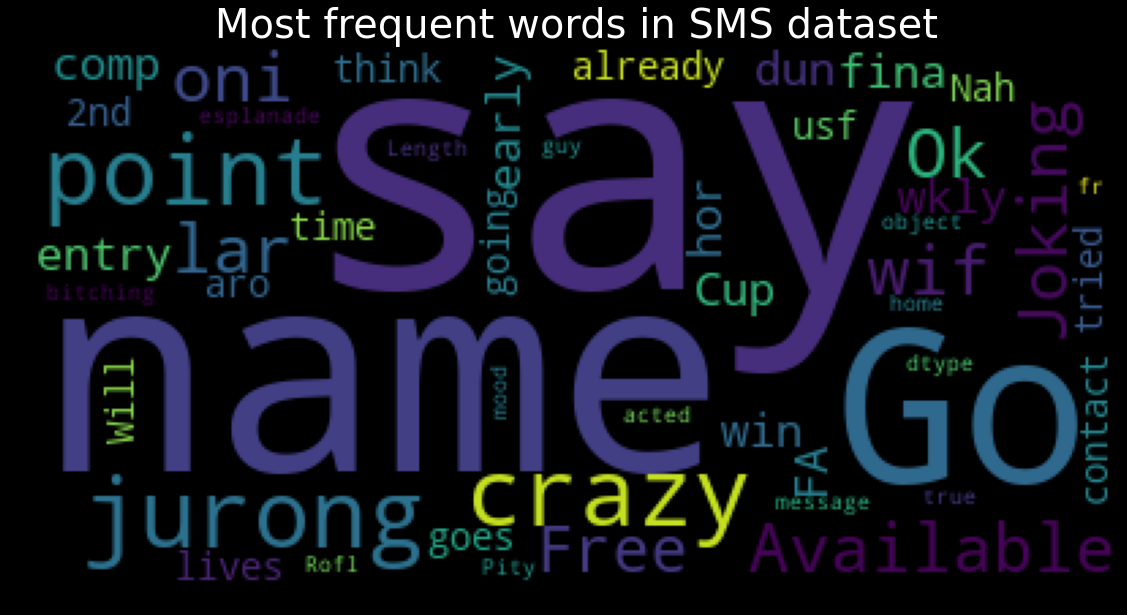

In [127]:
# Define wordcloud function from wordcloud library.
wc = WordCloud()
wc.generate(str(sms_df['message']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in SMS dataset", fontsize=40, color='white')
plt.imshow(wc)
plt.show()